In [1]:
%matplotlib widget
import matplotlib.pylab as plt
import numpy as np
import obspy
from hydrophone_data_processing import load, useful_variables, plotting
import matplotlib.dates as mdates
from obspy.signal.trigger import classic_sta_lta, trigger_onset, z_detect

import scipy.signal as signal

In [2]:
day141_paths = useful_variables.make_hydrophone_data_paths(borehole='a', year=2019, julian_day=141)
day141 = load.import_corrected_data_for_single_day(day141_paths)


day141_snapshot = day141.slice(starttime=obspy.UTCDateTime('2019-05-21T07:30:00')
                   ,endtime=obspy.UTCDateTime('2019-05-21T08:38:30'))

day141_snapshot.filter(type='highpass', corners=4, zerophase=True, freq=20)

6 Trace(s) in Stream:
7F.A00.01.GDH | 2019-05-21T07:30:00.000000Z - 2019-05-21T08:38:30.000000Z | 1000.0 Hz, 4110001 samples
7F.A00.02.GDH | 2019-05-21T07:30:00.000000Z - 2019-05-21T08:38:30.000000Z | 1000.0 Hz, 4110001 samples
7F.A00.03.GDH | 2019-05-21T07:30:00.000000Z - 2019-05-21T08:38:30.000000Z | 1000.0 Hz, 4110001 samples
7F.A00.04.GDH | 2019-05-21T07:30:00.000000Z - 2019-05-21T08:38:30.000000Z | 1000.0 Hz, 4110001 samples
7F.A00.05.GDH | 2019-05-21T07:30:00.000000Z - 2019-05-21T08:38:30.000000Z | 1000.0 Hz, 4110001 samples
7F.A00.06.GDH | 2019-05-21T07:30:00.000000Z - 2019-05-21T08:38:30.000000Z | 1000.0 Hz, 4110001 samples

In [3]:
day141_snapshot[2:]

4 Trace(s) in Stream:
7F.A00.03.GDH | 2019-05-21T07:30:00.000000Z - 2019-05-21T08:38:30.000000Z | 1000.0 Hz, 4110001 samples
7F.A00.04.GDH | 2019-05-21T07:30:00.000000Z - 2019-05-21T08:38:30.000000Z | 1000.0 Hz, 4110001 samples
7F.A00.05.GDH | 2019-05-21T07:30:00.000000Z - 2019-05-21T08:38:30.000000Z | 1000.0 Hz, 4110001 samples
7F.A00.06.GDH | 2019-05-21T07:30:00.000000Z - 2019-05-21T08:38:30.000000Z | 1000.0 Hz, 4110001 samples

In [4]:
# fig, ax = plt.subplots(figsize=(15, 5))

# for n, tr in enumerate(day141_snapshot[2:]):
#     ax.plot(tr.times('matplotlib'), np.cumsum(tr.data**2), label='H{n}'.format(n=n+3))

# ax.xaxis.set_major_formatter(plotting.PrecisionDateFormatter("%H:%M:%S.{ms}"))
# ax.set_ylabel('Cumulative Amplitude^2', fontsize=15)
# ax.legend(fontsize=15)

In [13]:

detector_data = {
    'h3':{
        'start':obspy.UTCDateTime('2019-05-21T07:35:00Z')
        ,'end':obspy.UTCDateTime('2019-5-21T07:48:00Z')
        ,'height':0.25
        ,'distance':250
        ,'obspy_idx':2
    }
    ,'h4':{
        'start':obspy.UTCDateTime('2019-05-21T07:48:00Z')
        ,'end':obspy.UTCDateTime('2019-5-21T08:07:00Z')
        ,'height':0.5
        ,'distance':250
        ,'obspy_idx':3
    }
    ,'h5':{
        'start':obspy.UTCDateTime('2019-05-21T08:07:00Z')
        ,'end':obspy.UTCDateTime('2019-5-21T08:34:00Z')
        ,'height':0.5
        ,'distance':250
        ,'obspy_idx':4
    }
    ,'h6':{
        'start':obspy.UTCDateTime('2019-05-21T08:34:00Z')
        ,'end':obspy.UTCDateTime('2019-5-21T08:38:00Z')
        ,'height':0.5
        ,'distance':250
        ,'obspy_idx':5
    }
}
detector_data

{'h3': {'start': 2019-05-21T07:35:00.000000Z,
  'end': 2019-05-21T07:48:00.000000Z,
  'height': 0.25,
  'distance': 250,
  'obspy_idx': 2},
 'h4': {'start': 2019-05-21T07:48:00.000000Z,
  'end': 2019-05-21T08:07:00.000000Z,
  'height': 0.5,
  'distance': 250,
  'obspy_idx': 3},
 'h5': {'start': 2019-05-21T08:07:00.000000Z,
  'end': 2019-05-21T08:34:00.000000Z,
  'height': 0.5,
  'distance': 250,
  'obspy_idx': 4},
 'h6': {'start': 2019-05-21T08:34:00.000000Z,
  'end': 2019-05-21T08:38:00.000000Z,
  'height': 0.5,
  'distance': 250,
  'obspy_idx': 5}}

In [14]:
detector_data['h3']['start']

2019-05-21T07:35:00.000000Z

In [15]:
def peak_finder(obspydata, height, distance):
    amp_sq = obspydata.data**2
    data_idx, props = signal.find_peaks(amp_sq, height=height, distance=distance)
    return data_idx, props

In [16]:
def get_event_times(hydrophone):
    data = day141_snapshot.slice(starttime=detector_data[hydrophone]['start']
                                ,endtime=detector_data[hydrophone]['end'])
    data = data[detector_data[hydrophone]['obspy_idx']]
    idx, props = peak_finder(obspydata=data
                             , height=detector_data[hydrophone]['height']
                             , distance=detector_data[hydrophone]['distance'])
    
    detector_data[hydrophone]['event_times'] = data.times('matplotlib')[idx]
    return detector_data[hydrophone]['event_times']

In [28]:
list(detector_data.keys())

['h3', 'h4', 'h5', 'h6']

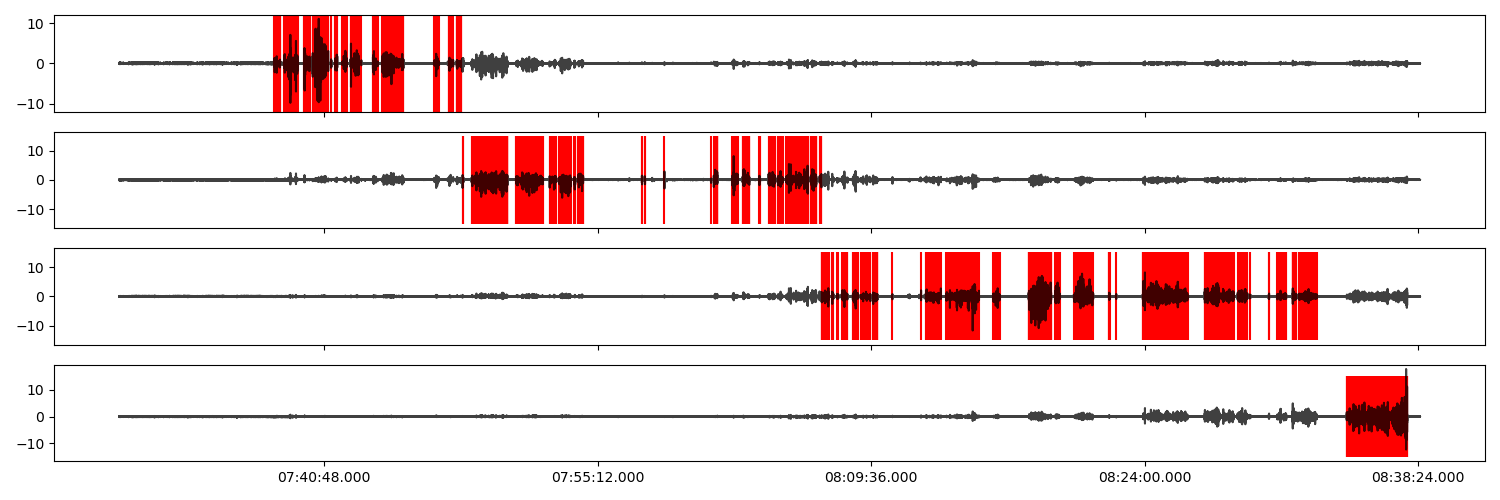

In [33]:
fig, axes = plt.subplots(4, 1, figsize=(15, 5), sharex=True)

for n, ax in enumerate(axes):
    data = day141_snapshot[n+2]
    ax.plot(data.times('matplotlib'), data.data, color='black', alpha=0.75)
    h_id = list(detector_data.keys())[n]
    # ax.vlines(x=get_event_times('h3'), ymin=-15, ymax=15, color='red')
    ax.vlines(x=get_event_times(h_id), ymin=-15, ymax=15, color='red')


axes[0].set_ylim(-12, 12)
axes[-1].xaxis.set_major_formatter(plotting.PrecisionDateFormatter("%H:%M:%S.{ms}"))
fig.tight_layout()

In [16]:
h3 = day141_snapshot.slice(starttime=detector_times['h3']['start']
                     ,endtime=detector_times['h3']['end'])[2]

h3_idx, h3_props = peak_finder(obspydata=h3, height=0.5, distance=250)

detector_data['h3']['event_times'] = h3.times('matplotlib')[h3_index]

In [ ]:
h4 = day141_snapshot.slice(starttime=detector_times['h4']['start']
                     ,endtime=detector_times['h4']['end'])[3]

h4_idx, h4_props = peak_finder(obspydata=h4, height=0.5, distance=250)

In [ ]:
h5 = day141_snapshot.slice(starttime=detector_times['h5']['start']
                     ,endtime=detector_times['h5']['end'])[4]

h5_idx, h5_props = peak_finder(obspydata=h5, height=0.5, distance=250)

In [ ]:
h6 = day141_snapshot.slice(starttime=detector_times['h6']['start']
                     ,endtime=detector_times['h6']['end'])[5]

h6_idx, h6_props = peak_finder(obspydata=h6, height=0.5, distance=250)

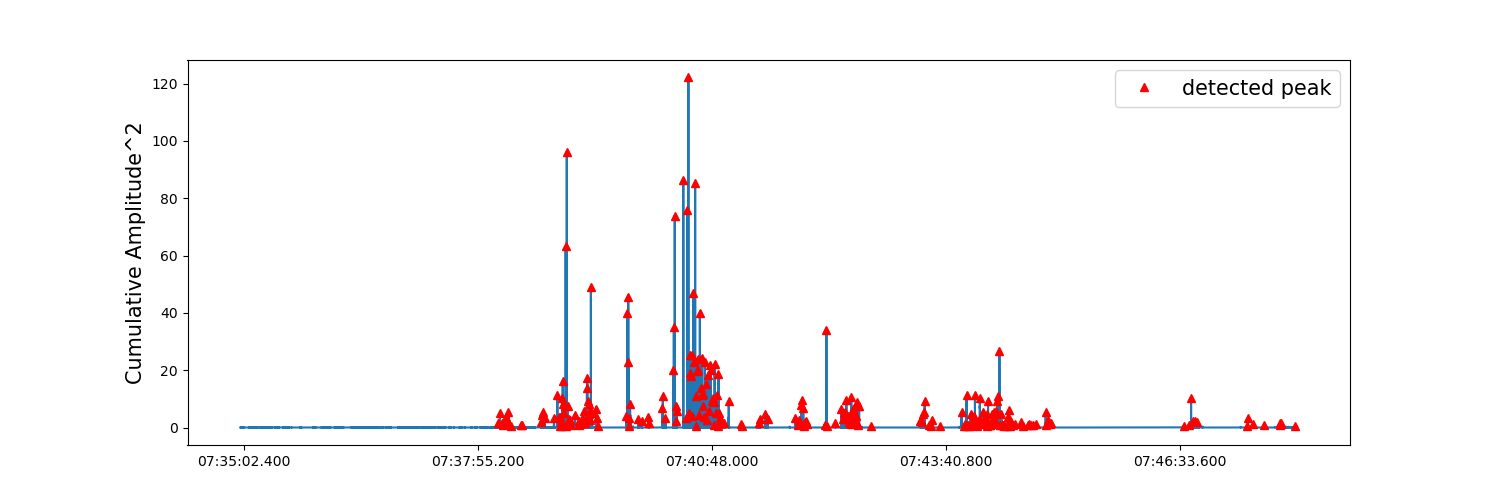

In [9]:
h3 = day141_snapshot.slice(starttime=detector_times['h3']['start']
                     ,endtime=detector_times['h3']['end'])[2]
h3_peaks_idx, props = signal.find_peaks(h3.data**2, height=0.5, distance=250)
h3_peak_heights = props['peak_heights']

fig, ax = plt.subplots(1, figsize=(15, 5), sharex=True, sharey=True)

ax.plot(h3.times('matplotlib'), h3.data**2)

t = h3.times('matplotlib')[h3_peaks_idx]
ax.plot(t, h3_peak_heights, marker='^', color='red', linewidth=0, label='detected peak')
ax.xaxis.set_major_formatter(plotting.PrecisionDateFormatter("%H:%M:%S.{ms}"))
ax.set_ylabel('Cumulative Amplitude^2', fontsize=15)
ax.legend(fontsize=15)

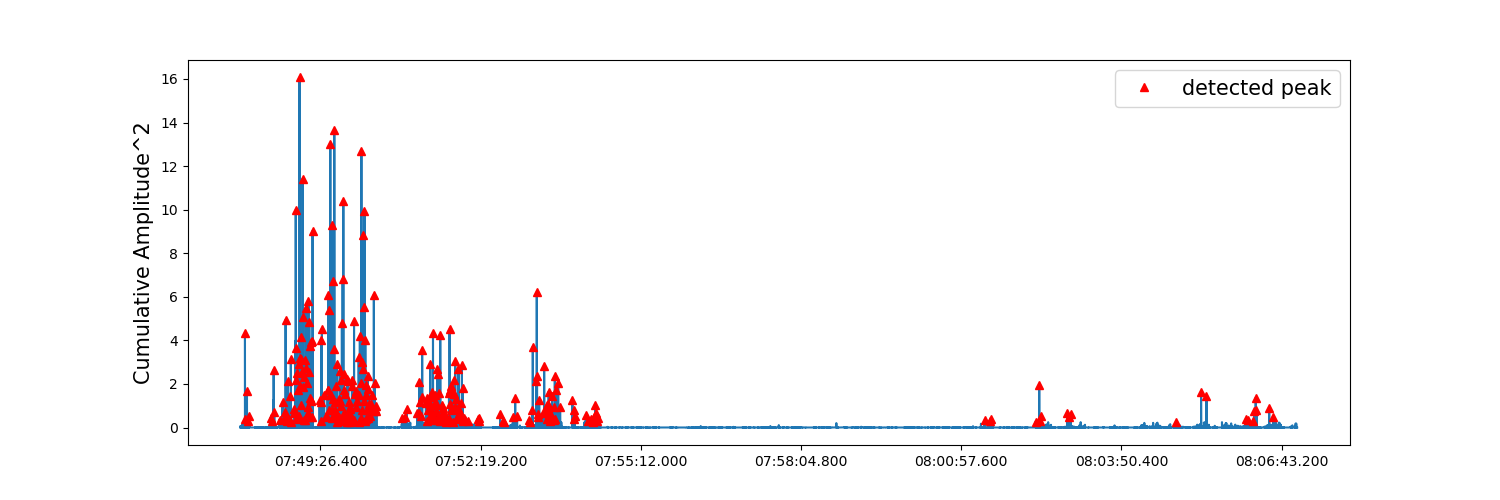

In [11]:
h4 = day141_snapshot.slice(starttime=detector_times['h4']['start']
                     ,endtime=detector_times['h4']['end'])[2]
h4_peaks_idx, props = signal.find_peaks(h4.data**2, height=0.25, distance=250)
h4_peak_heights = props['peak_heights']

fig, ax = plt.subplots(1, figsize=(15, 5), sharex=True, sharey=True)

ax.plot(h4.times('matplotlib'), h4.data**2)

t = h4.times('matplotlib')[h4_peaks_idx]
ax.plot(t, h4_peak_heights, marker='^', color='red', linewidth=0, label='detected peak')
ax.xaxis.set_major_formatter(plotting.PrecisionDateFormatter("%H:%M:%S.{ms}"))
ax.set_ylabel('Cumulative Amplitude^2', fontsize=15)
ax.legend(fontsize=15)

In [40]:
# h3_peaks_idx

array([190209, 191526, 192754, 196266, 197408, 197913, 221564, 222929,
       223555, 224521, 231477, 233973, 235318, 236239, 236655, 237608,
       237925, 238508, 238814, 239501, 240081, 240927, 241764, 242359,
       243062, 247067, 249682, 250893, 252165, 252777, 253361, 253974,
       254699, 255258, 255791, 256094, 256643, 257176, 257532, 257946,
       258235, 258720, 259549, 262693, 263458, 284894, 285506, 285756,
       286317, 287123, 287677, 293622, 296103, 301139, 301643, 311416,
       311804, 313754, 319378, 319932, 320611, 321231, 321509, 322015,
       326936, 328754, 329765, 330698, 331127, 331650, 332131, 332623,
       333135, 333695, 334236, 334871, 335682, 336228, 336935, 337573,
       337924, 338385, 339148, 339816, 340437, 340795, 341325, 341762,
       342103, 342713, 343966, 344696, 345261, 345797, 346647, 347255,
       348167, 348685, 349227, 350047, 350822, 351508, 352888, 353585,
       354263, 355808, 357133, 360464, 369798, 382628, 383390, 387511,
      

In [41]:
# h3_peak_heights = props['peak_heights']
# h3_peak_heights

array([   1.62647726,    4.90200619,    1.68657048,    3.55037077,
          1.96560848,    5.46472005,    2.04372158,    4.44417421,
          5.35279232,    3.31068484,    3.21946174,   11.29656108,
          3.6313752 ,    3.55166023,    1.95144125,   10.17644911,
         16.20034982,    8.33131166,    5.14720314,    7.59434489,
         63.21506509,   96.17723156,    7.67044105,    2.88200753,
          2.70606212,    4.22125603,    2.20345377,    1.3832465 ,
          2.82583706,    2.53318022,    2.10079013,    5.69816781,
          1.51912119,    2.7383496 ,   13.81367439,   17.27712099,
          9.25012718,    4.67066441,    8.17782423,    2.50774264,
          5.800985  ,   48.91756678,    4.92553027,    6.56056683,
          3.47259042,    3.97290132,   39.91301983,   22.94104781,
         45.5029354 ,    3.45979093,    8.33578576,    3.07810329,
          2.13848397,    3.82159704,    1.46340278,    6.72825232,
         11.06434903,    3.42112139,   20.22670088,   35.02078

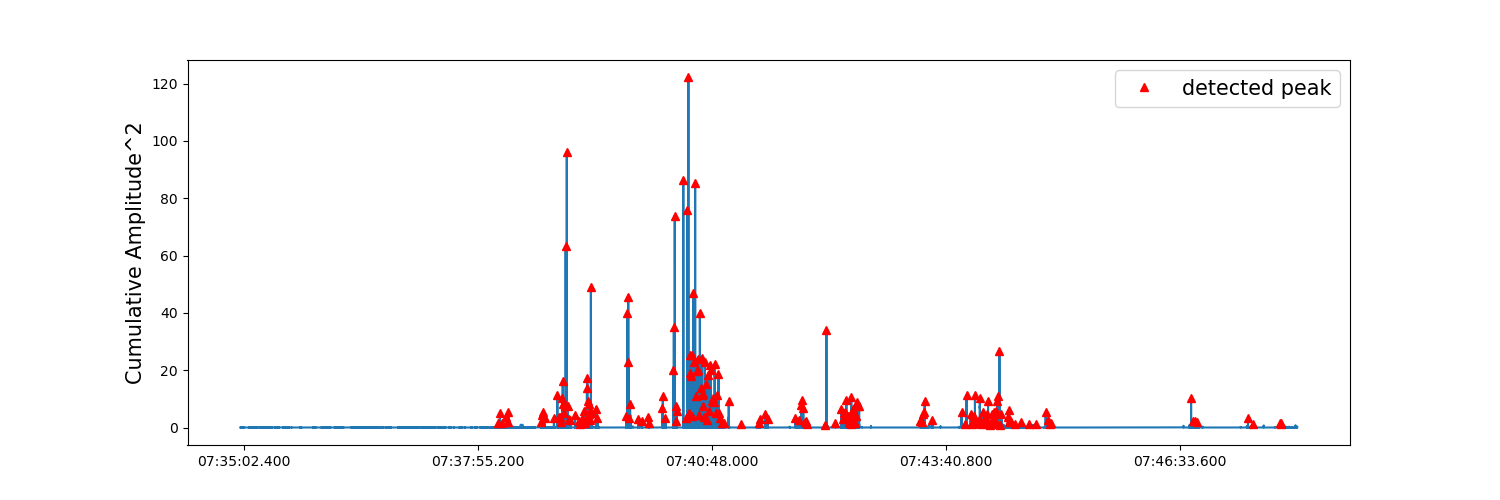

In [37]:
# np.sqrt(0.99999)

0.99999499998749997

In [18]:
# if type(h3) == obspy.core.trace.Trace:
#     print('wtf')

wtf


In [6]:
staltas = {}

sample_rate = day141_snapshot[2].stats.sampling_rate

for n, d in enumerate(detector_times.items()):
    start = obspy.UTCDateTime(d[1]['start'])
    end = obspy.UTCDateTime(d[1]['end'])
    hydrophone_n = n + 3
    
    data = day141_snapshot[n+2].copy()
    data = data.slice(starttime=start, endtime=end)    
    
    # cft = classic_sta_lta(data, nsta=1*sample_rate, nlta=10*sample_rate)
    # trigger_onset(cft, thres1=1.25*2, thres2=1.25, max_len=2*sample_rate)
   
    
    
    cft = classic_sta_lta(data, nsta=1*sample_rate, nlta=2*sample_rate)
    trigger = trigger_onset(cft, thres1=1.25, thres2=1.15, max_len=2*sample_rate)

    # cft = z_detect(data, nsta=int(1*sample_rate))
    # trigger = trigger_onset(cft, thres1=-0.2, thres2=-0.4)
    
    staltas[d[0]] = {
        'start':start
        ,'end':end
        ,'cft':cft
        ,'trigger':trigger
        ,'data':data
    }

In [7]:
data

7F.A00.06.GDH | 2019-05-21T08:34:00.000000Z - 2019-05-21T08:38:00.000000Z | 1000.0 Hz, 240001 samples

In [8]:
staltas.keys()

dict_keys(['h3', 'h4', 'h5', 'h6'])

In [9]:
staltas['h3'].keys()

dict_keys(['start', 'end', 'cft', 'trigger', 'data'])

2019-05-21T07:35:00.000000Z
(1,)
2019-05-21T07:48:00.000000Z
(84,)
2019-05-21T08:07:00.000000Z
(1,)
2019-05-21T08:34:00.000000Z
(32,)


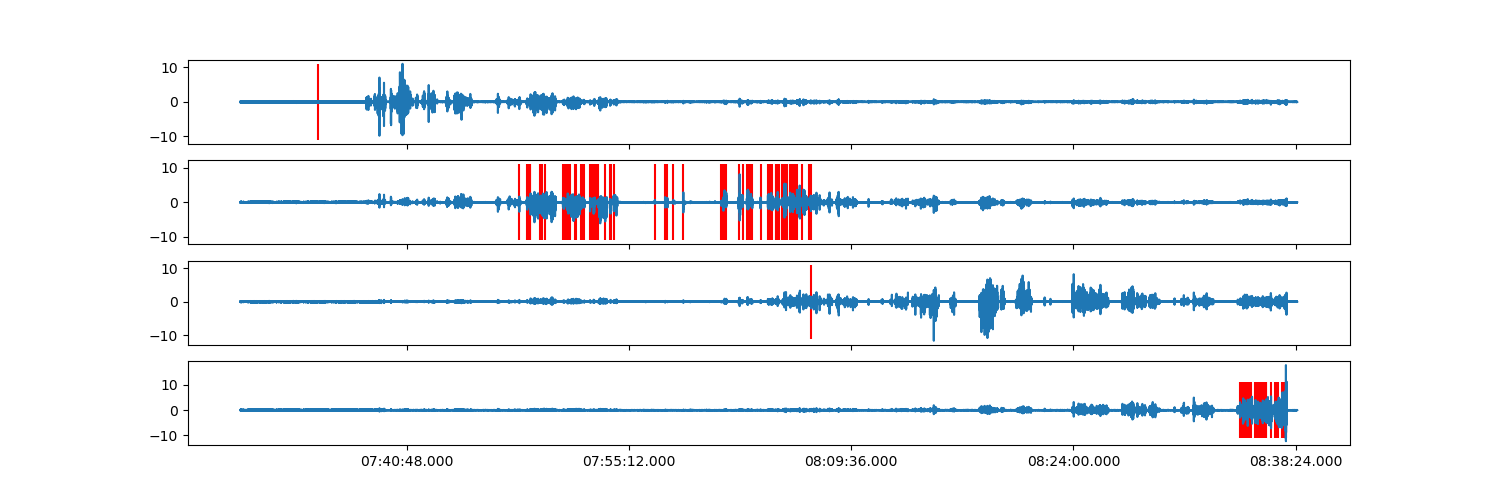

In [10]:
fig, ax = plt.subplots(4, 1, figsize=(15, 5), sharex=True)

for n, tr in enumerate(day141_snapshot[2:]):
    ax[n].plot(tr.times('matplotlib'), tr.data)


for n, h in enumerate(staltas.keys()):
    data = staltas[h]['data']
    times = data.times('matplotlib')
    
    on_t = times[staltas[h]['trigger'][:,0]]
    off_t = times[staltas[h]['trigger'][:,1]]
    
    ax[n].vlines(on_t, -11, 11, color='red')
    # break
    print(staltas[h]['start'])
    print(on_t.shape)
ax[n].xaxis.set_major_formatter(plotting.PrecisionDateFormatter("%H:%M:%S.{ms}"))


In [11]:
staltas

{'h3': {'start': 2019-05-21T07:35:00.000000Z,
  'end': 2019-05-21T07:48:00.000000Z,
  'cft': array([-0.30030031, -0.30030031, -0.30030031, ..., -0.25501106,
         -0.25500301, -0.25500126]),
  'trigger': array([[  1000, 780000]]),
  'data': 7F.A00.03.GDH | 2019-05-21T07:35:00.000000Z - 2019-05-21T07:48:00.000000Z | 1000.0 Hz, 780001 samples},
 'h4': {'start': 2019-05-21T07:48:00.000000Z,
  'end': 2019-05-21T08:07:00.000000Z,
  'cft': array([-0.50932476, -0.50932476, -0.50932476, ..., -0.40018366,
         -0.41172753, -0.41351824]),
  'trigger': array([[   4988,    6121],
         [  34230,   37659],
         [  43042,   43960],
         [  45514,   46775],
         [  46958,   79002],
         [  85511,   89127],
         [  90387,   92218],
         [  92712,  105588],
         [ 105917,  147944],
         [ 174321,  176764],
         [ 177493,  179057],
         [ 179608,  181491],
         [ 181865,  183025],
         [ 183352,  184408],
         [ 190063,  191810],
         [ 1

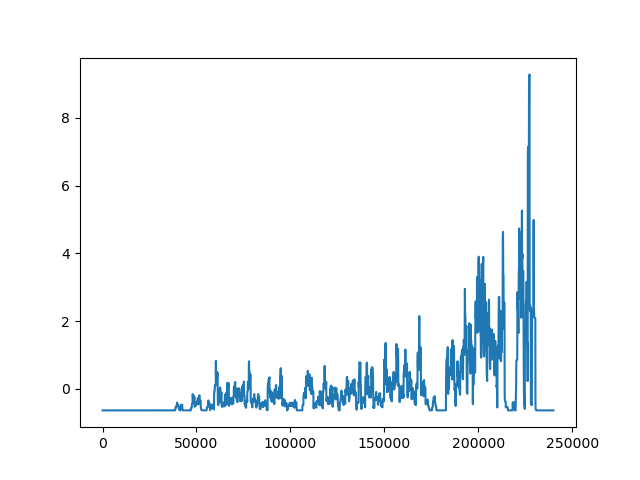

In [12]:
fig, ax = plt.subplots()
ax.plot(cft)